Build a random forest classifier to predict the risk of heart disease based on a dataset of patient
information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type,
resting blood pressure, serum cholesterol, and maximum heart rate achieved.

Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?usp=share_link

1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the
numerical features if necessary.

2. Split the dataset into a training set (70%) and a test set (30%).

3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each
tree. Use the default values for other hyperparameters.

4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score. 

5. Use the feature importance scores to identify the top 5 most important features in predicting heart
disease risk. Visualise the feature importances using a bar chart.

6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try
different values of the number of trees, maximum depth, minimum samples split, and minimum samples
leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

7. Report the best set of hyperparameters found by the search and the corresponding performance
metrics. Compare the performance of the tuned model with the default model.

8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the
decision boundaries on a scatter plot of two of the most important features. Discuss the insights and
limitations of the model for predicting heart disease risk.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import rcParams
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('heartdiseasedata.csv')

### Preprocessing

In [3]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


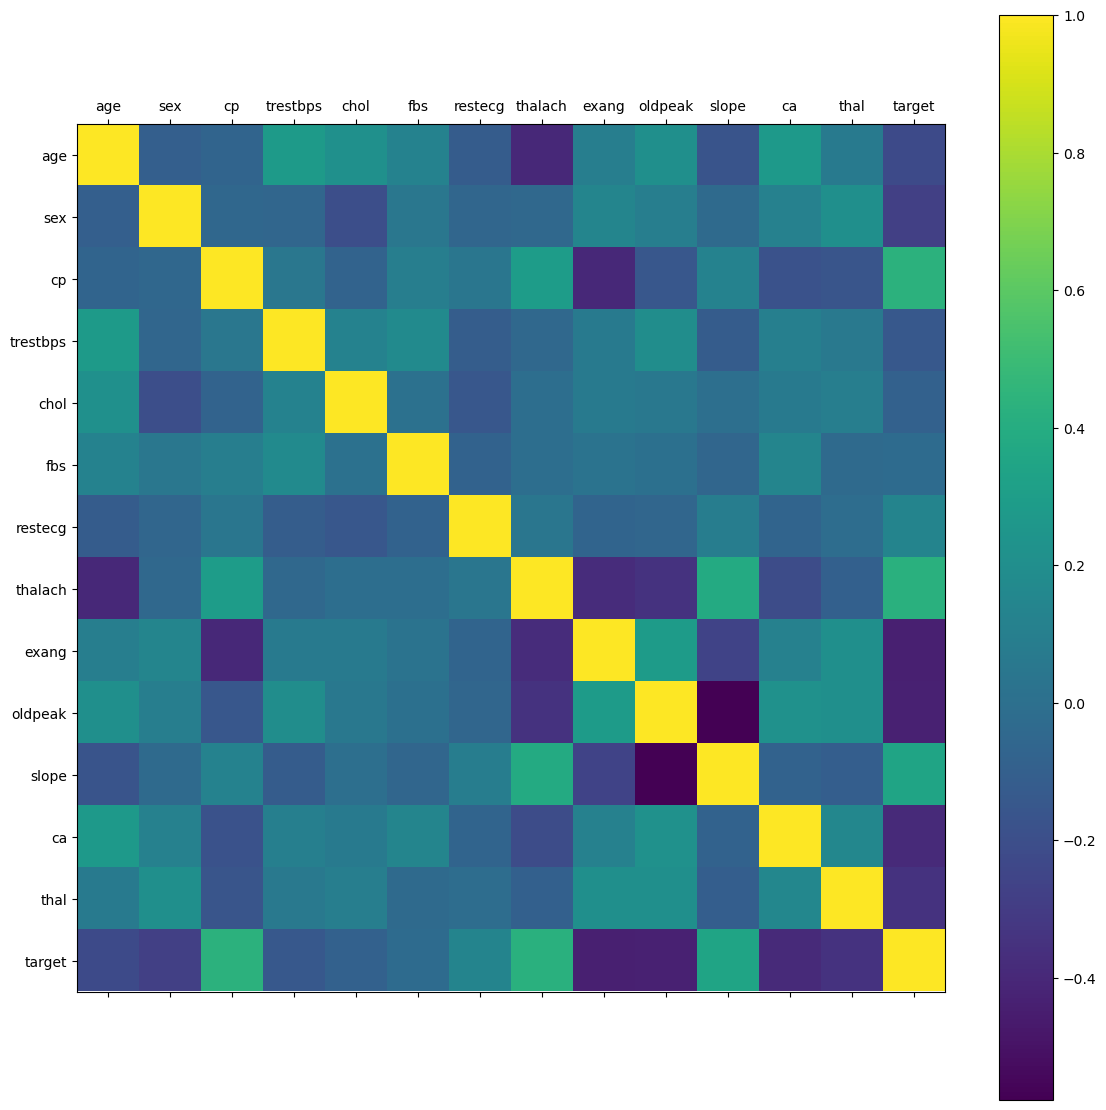

In [5]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(data.corr())
plt.yticks(np.arange(data.shape[1]), data.columns)
plt.xticks(np.arange(data.shape[1]), data.columns)
plt.colorbar()

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'sex'}>,
        <AxesSubplot: title={'center': 'cp'}>,
        <AxesSubplot: title={'center': 'trestbps'}>],
       [<AxesSubplot: title={'center': 'chol'}>,
        <AxesSubplot: title={'center': 'fbs'}>,
        <AxesSubplot: title={'center': 'restecg'}>,
        <AxesSubplot: title={'center': 'thalach'}>],
       [<AxesSubplot: title={'center': 'exang'}>,
        <AxesSubplot: title={'center': 'oldpeak'}>,
        <AxesSubplot: title={'center': 'slope'}>,
        <AxesSubplot: title={'center': 'ca'}>],
       [<AxesSubplot: title={'center': 'thal'}>,
        <AxesSubplot: title={'center': 'target'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

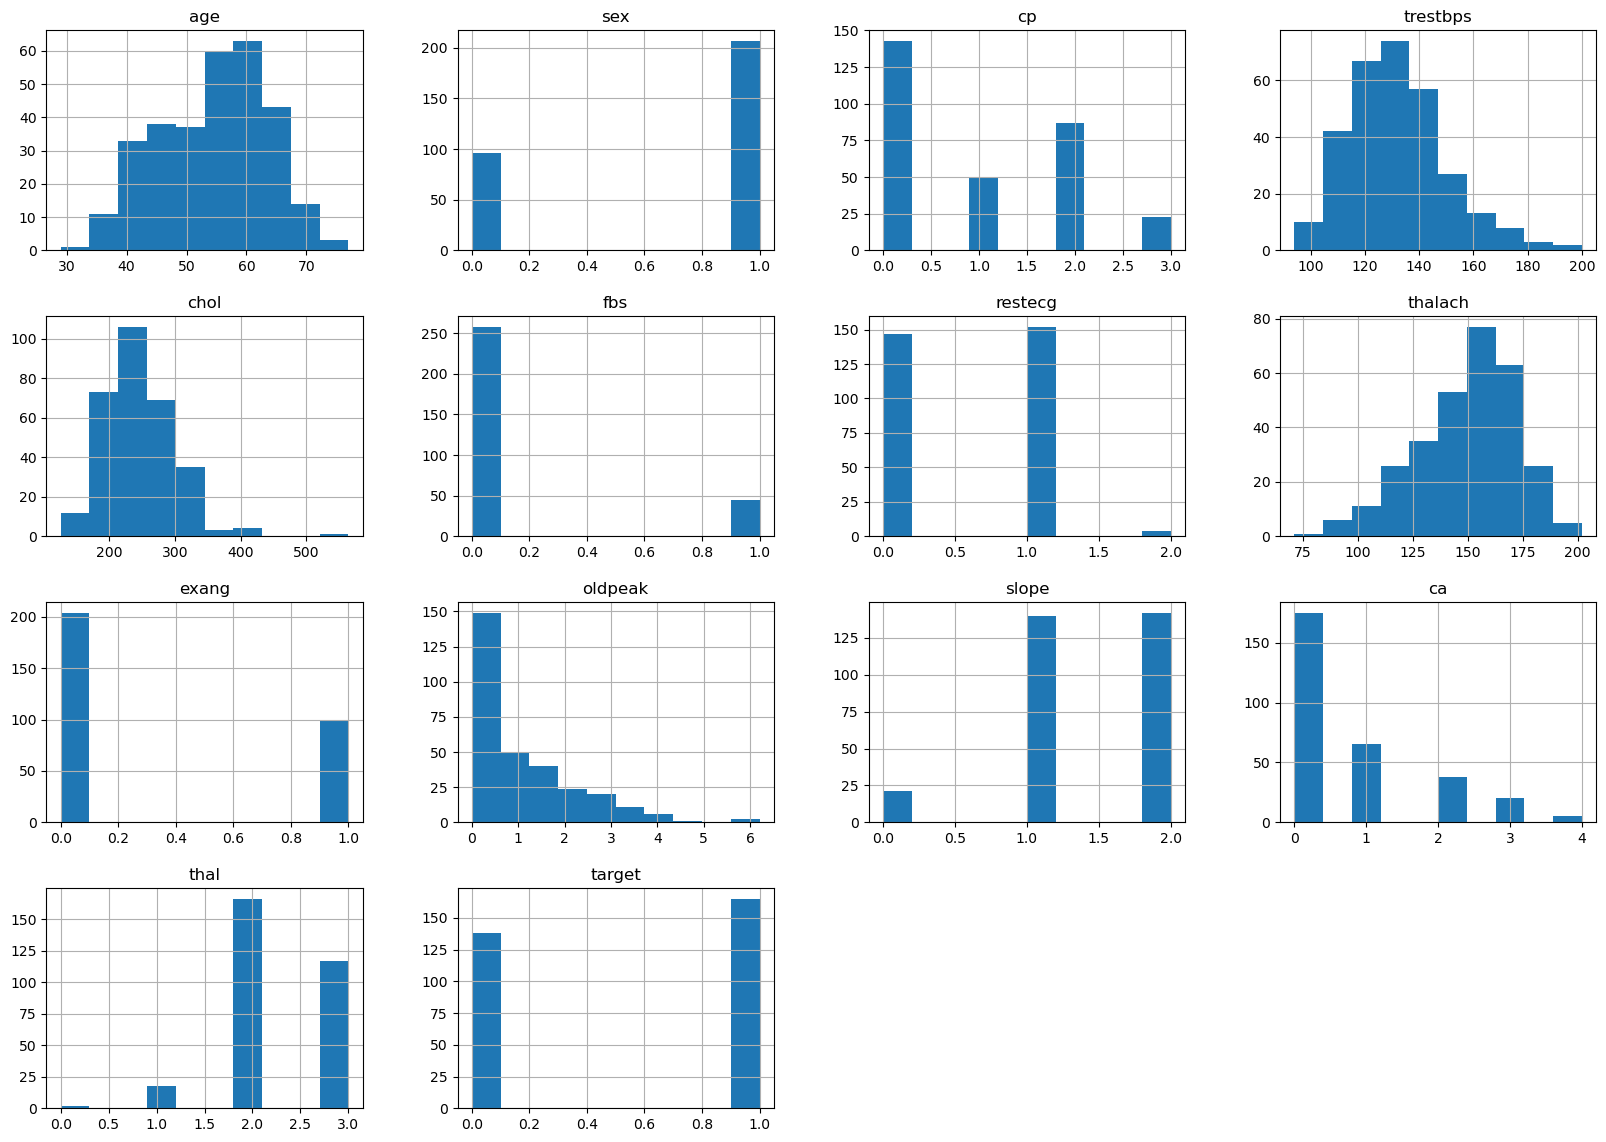

In [6]:
# to check for distribution and decide for scaling of  numerical features 
data.hist()

Text(0.5, 1.0, 'Count of each Target Class')

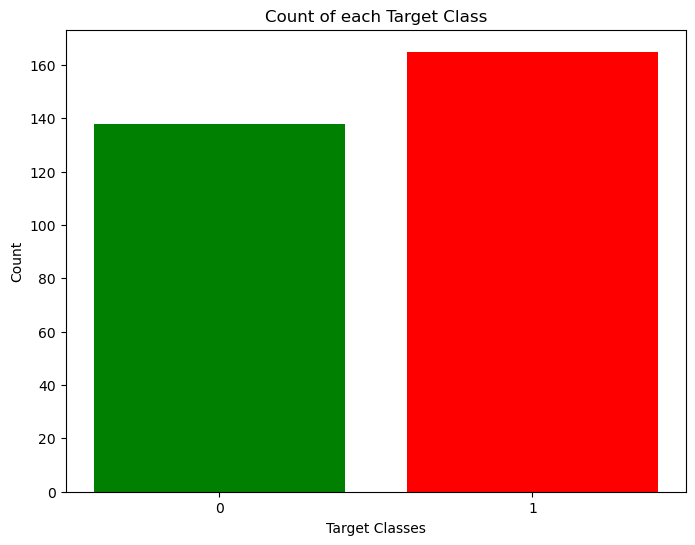

In [7]:
# it would be great to check for equality of target classes

rcParams['figure.figsize'] = 8,6
plt.bar(data['target'].unique(), data['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [8]:
data = pd.get_dummies(data, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [9]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[columns_to_scale] = standardScaler.fit_transform(data[columns_to_scale])

In [10]:
X = data.drop("target", axis=1)
y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Random Forest Classifier

In [11]:
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [12]:
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [13]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.81
Precision: 0.84
Recall: 0.82
F1 Score: 0.83


In [14]:
feature_importances = rf_classifier.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(feature_importances)[::-1]
top_features = feature_names[sorted_idx][:5]

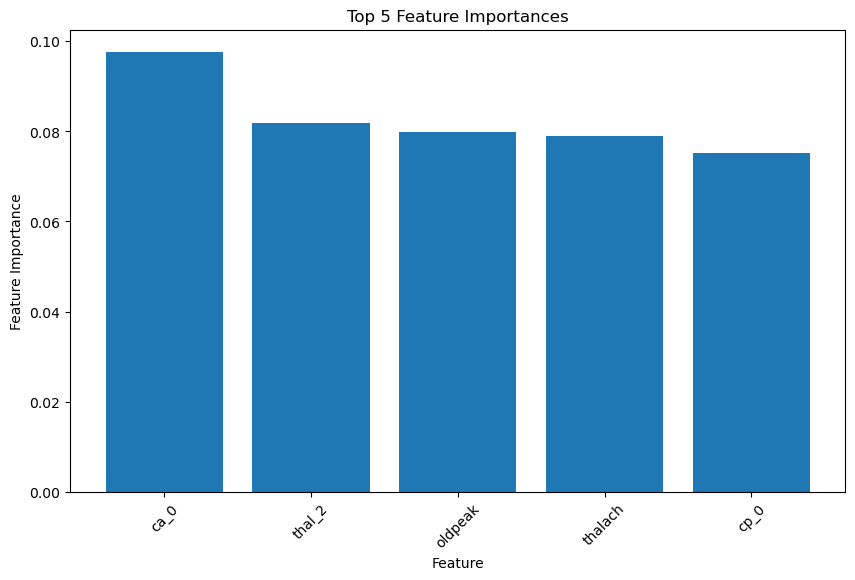

In [15]:
plt.figure(figsize=(10, 6))
plt.bar(range(5), feature_importances[sorted_idx][:5])
plt.xticks(range(5), top_features, rotation=45)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Top 5 Feature Importances")
plt.show()

In [16]:
param_grid = {
    'n_estimators': [10, 50, 100, 200], 
    'max_depth': [5, 10, 15, 20, 25],  
    'min_samples_split': [2, 5, 8, 10], 
    'min_samples_leaf': [1, 2, 4, 6]
}

In [17]:
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

In [18]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10, random_state=42),
             param_grid={'max_depth': [5, 10, 15, 20, 25],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 8, 10],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [19]:
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [20]:
print("Best Hyperparameters:")
print(best_params)
print(f"Best Cross-Validation Accuracy: {best_accuracy:.2f}")

Best Hyperparameters:
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.84


In [21]:
tuned_rf_classifier = grid_search.best_estimator_
y_pred_tuned = tuned_rf_classifier.predict(X_test)

In [22]:
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)

print("\nPerformance Metrics on Test Set (Tuned Model):")
print(f"Accuracy: {accuracy_tuned:.2f}")
print(f"Precision: {precision_tuned:.2f}")
print(f"Recall: {recall_tuned:.2f}")
print(f"F1 Score: {f1_tuned:.2f}")


Performance Metrics on Test Set (Tuned Model):
Accuracy: 0.84
Precision: 0.84
Recall: 0.86
F1 Score: 0.85


In [23]:
print("Best Hyperparameters from Grid Search:")
print(best_params)

print("\nPerformance Metrics on Test Set (Default Model):")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

print("\nPerformance Metrics on Test Set (Tuned Model):")
print(f"Accuracy: {accuracy_tuned:.2f}")
print(f"Precision: {precision_tuned:.2f}")
print(f"Recall: {recall_tuned:.2f}")
print(f"F1 Score: {f1_tuned:.2f}")

Best Hyperparameters from Grid Search:
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 100}

Performance Metrics on Test Set (Default Model):
Accuracy: 0.81
Precision: 0.84
Recall: 0.82
F1 Score: 0.83

Performance Metrics on Test Set (Tuned Model):
Accuracy: 0.84
Precision: 0.84
Recall: 0.86
F1 Score: 0.85


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


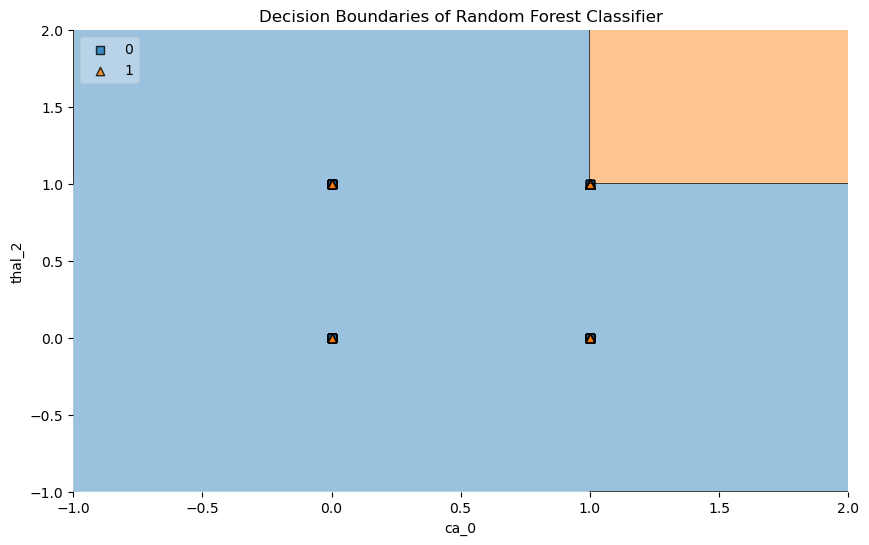

In [26]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

X_two_features = X_train[top_features[:2]]

rf_classifier_two_features = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_classifier_two_features.fit(X_two_features, y_train)

plt.figure(figsize=(10, 6))
plot_decision_regions(X_two_features.values, y_train.values, clf=rf_classifier_two_features, legend=2)
plt.xlabel(top_features[0])
plt.ylabel(top_features[1])
plt.title("Decision Boundaries of Random Forest Classifier")
plt.show()

### Insights:

Complex Decision Boundaries: The Random Forest model is capable of capturing complex and non-linear decision boundaries. It can adapt to different patterns in the data.

Separation of Classes: The visualization may show clear separation between the two classes (presence and absence of heart disease) based on the selected features. This suggests that the model can make reasonably accurate predictions.

Overlap: There might be some overlap between the decision regions, especially in areas where the classes are close or share similar feature values. This is a limitation, as it can lead to misclassifications in these overlapping regions.

### Limitations:

High-Dimensional Data: Visualizing decision boundaries is practical when dealing with a small number of features (as in this case with two features). In reality, datasets can have many more features, making it impossible to visualize the decision boundaries in higher dimensions.

Feature Importance: The selection of "age" and "maximum heart rate achieved" as the two most important features is based on the model's perspective. These features might not be the most clinically or biologically relevant factors for predicting heart disease.

Data Complexity: The model's ability to capture complex decision boundaries can lead to overfitting if not carefully regularized. This is why hyperparameter tuning is crucial.

Generalization: The decision boundaries seen in the visualization are based on the training data. The model's true performance should be assessed using a separate test dataset to evaluate its generalization ability.

Feature Engineering: The choice of features can greatly impact the model's performance. Domain knowledge and additional feature engineering might lead to better predictive power.